In [1]:
import pandas as pd

# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

from sklearn.feature_selection import chi2 # хи-квадрат

import numpy as np

In [2]:
hotels = pd.read_csv('../data/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


# Нужны преобразования

### 1) Пропуски

In [3]:
list_address={'20 Rue De La Ga t 14th arr 75014 Paris France':[48.838331, 2.330948],
 '23 Rue Damr mont 18th arr 75018 Paris France':[48.856663, 2.351556],
 '4 rue de la P pini re 8th arr 75008 Paris France':[44.222128, 8.410980],
 'Bail n 4 6 Eixample 08010 Barcelona Spain':[41.396133, 1.655829],
 'Sep lveda 180 Eixample 08011 Barcelona Spain':[41.391510, 2.155331],
 'Pau Clar s 122 Eixample 08009 Barcelona Spain':[41.504994, 2.245959],
 'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria':[48.209410, 16.323834],
 'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria':[48.222139, 16.357513],
 'Hasenauerstra e 12 19 D bling 1190 Vienna Austria':[48.778035, 15.655650],
 'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria':[48.210918, 16.347119],
 'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria':[48.210918, 16.347119],
 'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria':[48.188405, 16.383052],
 'Paragonstra e 1 11 Simmering 1110 Vienna Austria':[48.176599, 16.413999],
 'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria':[48.245935, 16.341397],
 'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria':[48.218213, 16.394110],
 'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria':[48.225182, 16.358573],
 'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria':[48.225182, 16.358573]}

for a in list_address:
    hotels.loc[hotels['hotel_address']==a,'lat']=list_address[a][0]
    hotels.loc[hotels['hotel_address']==a,'lng']=list_address[a][1]
    # list_temp.loc[:,'lat']=list_address[a][0]

hotels.shape     

(386803, 17)

In [4]:
# print('Проверка пропусков')
# display(hotels.isnull().sum().sort_values(ascending=False)) # Проверка пропусков

In [5]:
# #создаем словарь имя столбца: число(признак) на который надо заменить пропуски
# values = {
#     'lng': hotels['lng'].median(),
#     'lat': hotels['lat'].median()
# }
# #заполняем пропуски в соответствии с заявленным словарем
# # hotels = hotels.fillna(values)
# # hotels = hotels.fillna(0)

Создаём словарь и с помощью словаря восполняем пропуски 

In [6]:
# d_list={}
# list_nan=set()
# n=0
# def address(data):
#     b_list=[]
#     global n
#     a=data['hotel_address']
#     b=data['lng']
#     if a in d_list:
#         b_list=d_list[a]
#         if (not np.isnan(b)) and (b!=b_list[0]):
#             b_list.append(b)
#             d_list[a]=b_list
#             n+=1                  
#     else:
#         if not np.isnan(b):
#            d_list[a]=[b]
           
# def address_nan(data):
#     global n
#     a=data['hotel_address']
#     b=data['lng']
#     if np.isnan(b):
#         if a in d_list:
#             return d_list[a][0]
#         else:
#             list_nan.add(a)
#             n+=1
#     return b
        

    
# hotels.apply(address, axis=1)
# print('Количество разных адресов',n)
# print(len(list_nan))
# list_nan=set()
# hotels['lng']=hotels.apply(address_nan , axis=1)
# print(len(list_nan))

In [7]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(hotels, title="Pandas Profiling Report")

# profile

### 2) НОВЫЕ ПРИЗНАКИ

In [8]:
# https://apps.skillfactory.ru/learning/course/course-v1:SkillFactory+DST-3.0+28FEB2021/block-v1:SkillFactory+DST-3.0+28FEB2021+type@sequential+block@4fe35f98b58b4459a29dd30badebf2d6/block-v1:SkillFactory+DST-3.0+28FEB2021+type@vertical+block@50a5911d6e7f43d2ac47907d02631c4e

# hotels['days'] = hotels['days_since_review'].str.findall(r'\d+').str.get(0)
# hotels.drop('days_since_review', axis = 1, inplace=True)
# hotels['days']=hotels['days'].astype(int)

In [9]:
# hotels['No Negative']=0
# hotels.loc[hotels['negative_review']  == 'No Negative','No Negative']=1
# hotels.drop('negative_review', axis = 1, inplace=True)

# hotels['No Positive']=1
# hotels.loc[hotels['positive_review']  == 'No Positive','No Positive']=0
# hotels.drop('positive_review', axis = 1, inplace=True)

# hotels.shape
# # print(hotels[hotels['negative_review']  == 'No Negative'].shape[0])
# # print(hotels[hotels['positive_review']  == 'No Positive'].shape[0])

In [10]:
# delet_list=["'",'[',']']
# dec_lict={}

# for index in hotels['tags']:#.unique():
#     for a in delet_list:
#         index=index.replace(a,"")
    
#     for a in index.split(', '):
#         if a in dec_lict:
#             dec_lict[a]+=1
#         else:
#             dec_lict[a]=1
   
# list_tags=sorted(dec_lict, key=dec_lict.get, reverse=True)[:10]


# for index in list_tags:
#     hotels[index]=0
#     hotels.loc[hotels['tags'].str.contains(index),index]=1

# hotels.drop('tags', axis = 1, inplace=True)

# hotels.shape
# # for i in list_tags:
# #     print(f'"{i}" : {dec_lict[i]}')

In [11]:
# delet_list=['The ','by ','Inn ']
# dec_lict={}

# for inde in hotels['hotel_name']:
#     for a in delet_list:
#         inde=inde.replace(a,"")
        
#     for a in inde.split(' '):
#         if a in dec_lict:
#             dec_lict[a]+=1
#         else:
#             dec_lict[a]=1
   
# list_tags=sorted(dec_lict, key=dec_lict.get, reverse=True)[:10]

# for index in list_tags:
#     hotels[index]=0
#     hotels.loc[hotels['hotel_name'].str.contains(index),index]=1

# hotels.drop('hotel_name', axis = 1, inplace=True)

# hotels.shape
# # for i in a:
# #     print(f'"{i}" : {dec_lict[i]}')

In [12]:
# delet_list=['The ','by ','Inn ']
# dec_lict={}

# for index in hotels['hotel_address']:
#     # for a in delet_list:
#     #     index=index.replace(a,"")
        
#     for a in index.split(' '):
#         if a in dec_lict:
#             dec_lict[a]+=1
#         else:
#             dec_lict[a]=1
   
# list_tags=sorted(dec_lict, key=dec_lict.get, reverse=True)[:10]
    
# for index in list_tags:
#     hotels[index]=0
#     hotels.loc[hotels['hotel_address'].str.contains(index),index]=1

# hotels.drop('hotel_address', axis = 1, inplace=True)

# hotels.shape

In [13]:
# # hotels['reviewer_nationality'].value_counts().head(10)
# dec_lict={}

# for index in hotels['reviewer_nationality']:
#     # for a in delet_list:
#     #     index=index.replace(a,"")
        
#     for a in index.split(' '):
#         if a in dec_lict:
#             dec_lict[a]+=1
#         else:
#             dec_lict[a]=1
   
# list_tags=sorted(dec_lict, key=dec_lict.get, reverse=True)[:10]
    
# for index in list_tags:
#     hotels[index]=0
#     hotels.loc[hotels['reviewer_nationality'].str.contains(index),index]=1

# hotels.drop('reviewer_nationality', axis = 1, inplace=True)

# hotels.shape

In [14]:
# hotels['review_date']=pd.to_datetime(hotels['review_date'])
# hotels['year']=hotels['review_date'].dt.year
# # print(hotels['year'].value_counts())
# hotels['quarter']=hotels['review_date'].dt.quarter
# # print(hotels['quarter'].value_counts())
# hotels['month']=hotels['review_date'].dt.month
# # print(hotels['month'].value_counts())
# hotels['weekday']=hotels['review_date'].dt.weekday
# # print(hotels['weekday'].value_counts())
# hotels.drop('review_date', axis = 1, inplace=True)
# print(hotels.shape)
# hotels.info()

In [15]:
# delet_list=['hotel_name','tags','days_since_review','hotel_address','negative_review','positive_review','reviewer_nationality']
# a=[]
# for i in hotels.columns:
#     if hotels[i].dtype == object:
#         if not i in delet_list:
#             a.append(i)
        
# hotels[a].nunique()

'review_date'

In [16]:
hotels_c=hotels.copy()

# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

# заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)

In [17]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

+ * hotel_address — адрес отеля;
+ * review_date — дата, когда рецензент разместил соответствующий отзыв;
+ + average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
+ * hotel_name — название отеля;
+ * reviewer_nationality — страна рецензента;
+ * negative_review — отрицательный отзыв, который рецензент дал отелю;
+ - review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
+ * positive_review — положительный отзыв, который рецензент дал отелю;
+ - review_total_positive_word_counts — общее количество слов в положительном отзыве.
+ + reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
+ - total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
+ - total_number_of_reviews — общее количество действительных отзывов об отеле;
+ * tags — теги, которые рецензент дал отелю;
+ * days_since_review — количество дней между датой проверки и датой очистки;
+ + additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
+ + lat — географическая широта отеля;
+ + lng — географическая долгота отеля.

In [18]:
print('Название колонок с числовыми данными')
a=[]
for i in hotels.columns:
    if not hotels[i].dtype == object:
        a.append(i)
        print(i)
        
# print(a)

Название колонок с числовыми данными
additional_number_of_scoring
average_score
review_total_negative_word_counts
total_number_of_reviews
review_total_positive_word_counts
total_number_of_reviews_reviewer_has_given
reviewer_score
lat
lng


In [19]:
# additional_number_of_scoring
# average_score
# review_total_negative_word_counts
# total_number_of_reviews
# review_total_positive_word_counts
# total_number_of_reviews_reviewer_has_given
# reviewer_score
# lat
# lng

# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts','review_total_positive_word_counts'
            ,'total_number_of_reviews','total_number_of_reviews_reviewer_has_given']

# категориальные признаки
cat_cols = ['average_score','additional_number_of_scoring', 'lat']#'reviewer_score','lng'

In [20]:
# display(hotels[num_cols].head(3))
hotels[cat_cols].head(3)
# hotels['reviewer_score'].value_counts()

,average_score,additional_number_of_scoring,lat
0,8.4,581,51.507894
1,8.3,299,51.521009
2,8.9,32,48.845377


# ?

<Axes: >

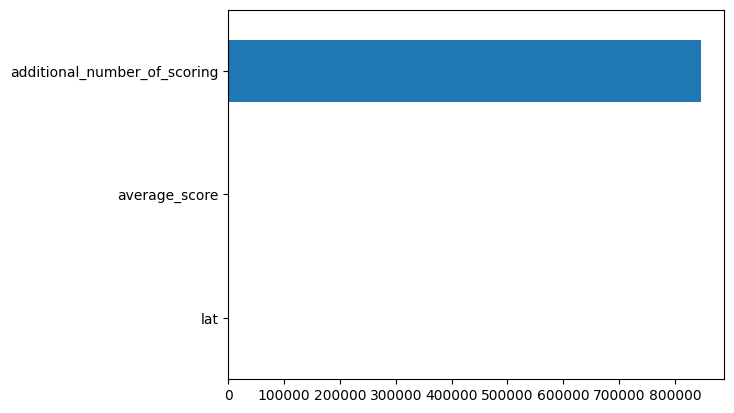

In [21]:
y=y.astype('int')


imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

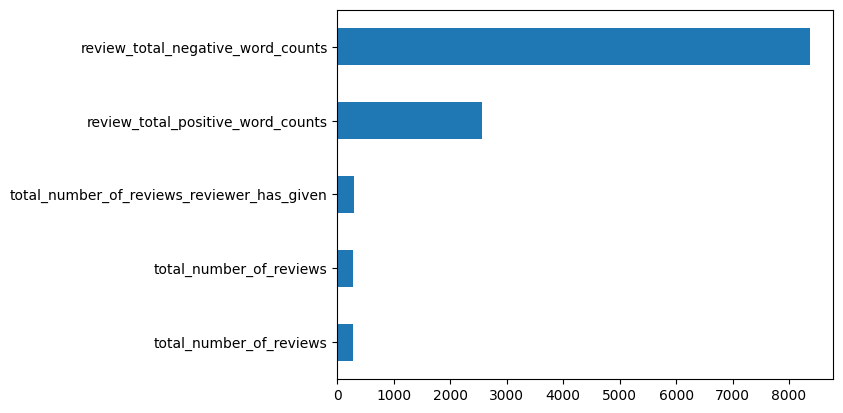

In [22]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

### Задание 4.2
Сколько уникальных названий отелей представлено в наборе данных?

In [23]:
hotels_c['hotel_name'].nunique()

1492

### Задание 4.3
Ответьте на вопросы о дате размещения отзывов.
Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd. 
Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.

In [24]:
hotels_c['review_date']=pd.to_datetime(hotels_c['review_date'])
print('самый свежий отзыв',max(hotels_c['review_date']))
print('самый первый отзыв',min(hotels_c['review_date']))
hotels_c['review_date'].sort_values(ascending=False)
# hotels['year']=hotels['review_date'].dt.year
# # print(hotels['year'].value_counts())
# hotels['quarter']=hotels['review_date'].dt.quarter
# # print(hotels['quarter'].value_counts())
# hotels['month']=hotels['review_date'].dt.month
# # print(hotels['month'].value_counts())
# hotels['weekday']=hotels['review_date'].dt.weekday
# # print(hotels['weekday'].value_counts())
# hotels.drop('review_date', axis = 1, inplace=True)
# print(hotels.shape)
# hotels.info()

самый свежий отзыв 2017-08-03 00:00:00
самый первый отзыв 2015-08-04 00:00:00


268933   2017-08-03
83327    2017-08-03
281594   2017-08-03
28250    2017-08-03
100707   2017-08-03
            ...    
277662   2015-08-04
217125   2015-08-04
133258   2015-08-04
2018     2015-08-04
157745   2015-08-04
Name: review_date, Length: 386803, dtype: datetime64[ns]

### Задание 4.4
Сколько уникальных тегов представлено в наборе данных?

In [25]:
delet_list=["'",'[',']']
dec_lict={}

for index in hotels_c['tags']:#.unique():
    for a in delet_list:
        index=index.replace(a,"")
    
    for a in index.split(', '):
        if a in dec_lict:
            dec_lict[a]+=1
        else:
            dec_lict[a]=1

print(len(dec_lict))   

# for i in list_tags:
#     print(f'"{i}" : {dec_lict[i]}')

2368


### Задание 4.5
Какой тег представлен в наибольшем числе отзывов?

In [26]:
print(sorted(dec_lict, key=dec_lict.get, reverse=True)[0])

 Leisure trip 


### Задание 4.6
Из тегов выясните, на сколько ночей чаще всего останавливаются путешественники в отелях.

In [27]:
# night
# hotels.loc[hotels['tags'].str.contains(index),index]=1
# list_tags=sorted(dec_lict, key=dec_lict.get, reverse=True)[:10]
list_tags={}

for index in dec_lict:
    if ('night' in index) and ('Stayed' in index):
        list_tags[index]=dec_lict[index]
        
sorted(list_tags, key=list_tags.get, reverse=True)[0]

' Stayed 1 night '

### Задание 4.7
Какое значение метрики MAPE вам удалось получить на этом этапе?

In [28]:
hotels_c=hotels.copy()

# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

# заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)

In [29]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [30]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
hotels_c=hotels.copy()

# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

In [32]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

# MAPE: 0.14136923280943037  было
# MAPE: 0.16024089937932007  стало

MAPE: 0.14141887621009572
